In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


In [ ]:
cohort = pd.read_csv('final_cohort_dod_cleaned.csv')

# cohort['survival_status'] = 1 - cohort['survival_status']  # survival status - should be 1 for alive, 0 for dead.
# cohort.to_csv('final_cohort_dod_fixed.csv')

# cohort['survival_status'] = cohort['survival_status'].map({0: 'Survived', 1: 'Deceased'})
# cohort = cohort.dropna()


cohort['male'] = cohort['male'].map({True: 'M', False: 'F'})
cohort.rename(columns={'male': 'gender'}, inplace=True)

In [ ]:
cohort

,age,bmi,SOFA,apsiii,charlson_comorbidity_index,los,survival_status,wbc,blood_glucose,glucose_variability,gender
0,20,22.171429,4,51,0,15.04,0,12.192593,162.500000,24.748737,M
1,24,33.990296,5,68,1,8.58,0,15.881818,133.714286,31.731763,M
2,44,30.405293,9,52,7,13.00,0,11.459792,168.250000,14.291606,M
3,46,27.681661,6,45,0,17.38,0,11.083871,119.857143,20.691613,M
4,52,33.057851,1,31,3,2.96,0,13.492857,103.500000,15.673757,F
...,...,...,...,...,...,...,...,...,...,...,...
11620,81,28.865306,6,53,6,25.29,1,11.400000,165.500000,23.334524,M
11621,83,34.717839,10,68,8,12.33,0,11.610000,125.166667,17.069466,M
11622,88,25.839681,4,40,8,8.08,1,10.421429,97.666667,21.385353,F
11623,91,19.260056,11,73,8,4.25,1,6.642857,78.500000,6.363961,M


In [ ]:

summaries = cohort.copy()
summaries['gender'] = cohort['gender'].map({'F': 0, 'M': 1})

# for the variable 'gender', we assign the value 0 to represent female and 1 to represent male.
summary_stats = summaries.describe()
display(summary_stats)

,age,bmi,SOFA,apsiii,charlson_comorbidity_index,los,survival_status,wbc,blood_glucose,glucose_variability,gender
count,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000
mean,65.127570,29.142773,6.426839,50.104516,4.733505,6.505954,0.350280,12.084023,145.560149,30.242099,0.618495
std,15.515349,7.553499,3.626227,23.525370,2.808134,7.592210,0.477078,7.477243,47.116401,28.191911,0.485777
min,18.000000,0.298606,0.000000,7.000000,0.000000,1.000000,0.000000,0.100000,34.000000,0.000000,0.000000
25%,56.000000,24.238227,4.000000,32.000000,3.000000,1.960000,0.000000,8.833333,118.200000,13.453624,0.000000
50%,67.000000,27.803427,6.000000,45.000000,4.000000,3.790000,0.000000,11.161538,134.750000,23.107478,1.000000
75%,77.000000,32.508522,9.000000,64.000000,7.000000,8.040000,1.000000,13.914706,159.500000,36.726702,1.000000
max,100.000000,93.296602,23.000000,184.000000,19.000000,101.750000,1.000000,386.700000,500.000000,299.813275,1.000000


In [ ]:
# for column in cohort.columns:
#     nan_count = cohort[column].isna().sum()
#     if nan_count:
#       print(f"Column '{column}' has {nan_count} NaN value(s).")

cohort.head()

,age,bmi,SOFA,apsiii,charlson_comorbidity_index,los,survival_status,wbc,blood_glucose,glucose_variability,gender
0,20,22.171429,4,51,0,15.04,0,12.192593,162.500000,24.748737,M
1,24,33.990296,5,68,1,8.58,0,15.881818,133.714286,31.731763,M
2,44,30.405293,9,52,7,13.00,0,11.459792,168.250000,14.291606,M
3,46,27.681661,6,45,0,17.38,0,11.083871,119.857143,20.691613,M
4,52,33.057851,1,31,3,2.96,0,13.492857,103.500000,15.673757,F


In [ ]:
df = cohort.copy()

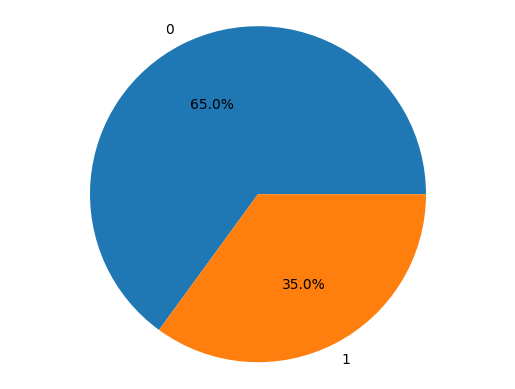


 ------- 



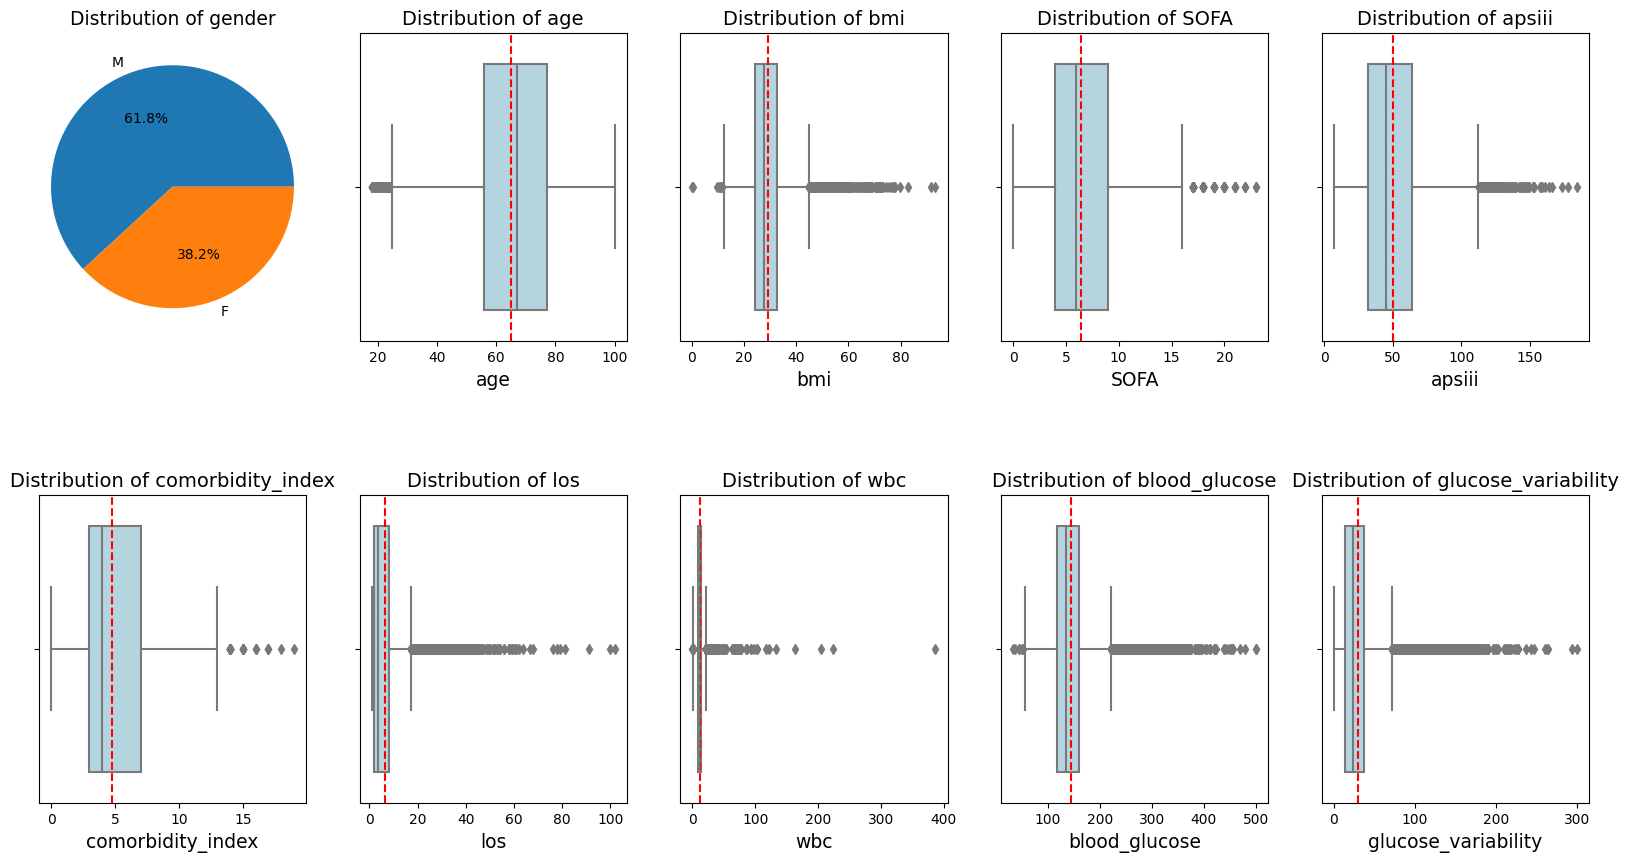

In [ ]:
# Plot bar plots for categorical variables (excluding binary variables)
def plot_categorical(variable, ax):
    df[variable].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {variable}')

# Plot pie chart for binary variables
def plot_binary(variable, ax):
    counts = df[variable].value_counts()
    pie, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'fontsize': 18})
    if not variable == 'survival_status':
        ax.set_title(f'Distribution of {variable}', fontsize=18)
    ax.axis('equal')
    for autotext in autotexts:
        autotext.set_fontsize(18)



def plot_numerical(variable, ax):
    # Create the boxplot
    sns.boxplot(x=df[variable], ax=ax, color='lightblue')
    # Add a line for the mean
    mean = df[variable].mean()
    ax.axvline(mean, color='red', linestyle='--')

    if variable == 'charlson_comorbidity_index':
     variable = 'comorbidity_index'

    # Set labels and title
    ax.set_xlabel(variable, fontsize=18)  # Increase font size
    ax.set_title(f'Distribution of {variable}', fontsize=18)  # Increase font size





fig, ax = plt.subplots()
plot_binary('survival_status', ax)
plt.show()
print("\n ------- \n")


# figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))


# Plotting
plot_binary('gender', axes[0, 0])
plot_numerical('age', axes[0, 1])
plot_numerical('bmi', axes[0, 2])
plot_numerical('SOFA', axes[0, 3])
plot_numerical('apsiii', axes[0, 4])

plot_numerical('charlson_comorbidity_index', axes[1, 0])
plot_numerical('los', axes[1, 1])
plot_numerical('wbc', axes[1, 2])
plot_numerical('blood_glucose', axes[1, 3])
plot_numerical('glucose_variability', axes[1, 4])
plt.subplots_adjust(hspace=0.5)  # Increase the value to add more vertical spacing
plt.show()

<ipython-input-13-00613e068c60>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[num_cols].corr()


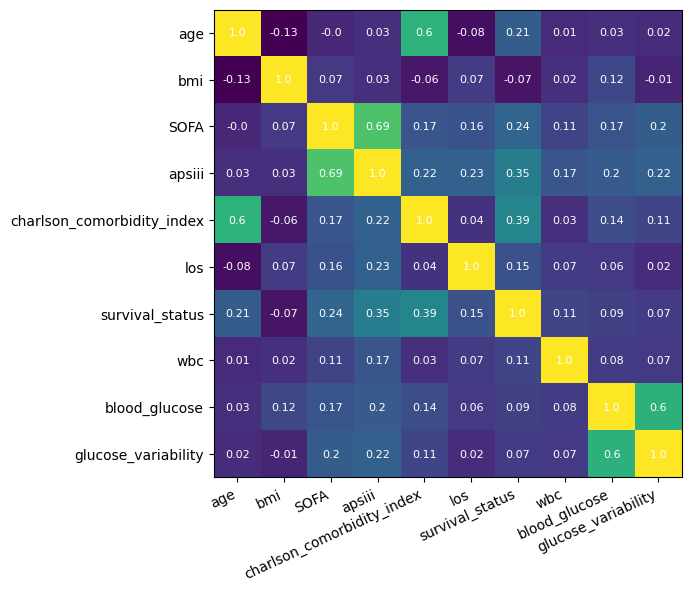

In [ ]:
num_cols = df.columns.to_list()

# Calculate correlation matrix
corr = df[num_cols].corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(7, 7))

im = ax.imshow(corr)

# Show values in squares
for i in range(len(corr)):
    for j in range(len(corr)):
        value = round(corr.iloc[i, j], 2)
        text = ax.text(j, i, value,
                       ha="center", va="center", color="w", fontsize=8)

ax.set_xticks(np.arange(len(corr)))
ax.set_yticks(np.arange(len(corr)))
ax.set_xticklabels(corr.columns, rotation=25, ha='right')
ax.set_yticklabels(corr.columns)

fig.tight_layout()
plt.show()

In [ ]:

# Add line breaks and formatting
print("")
print("Correlation Matrix:")
print("")
for i in range(len(corr)):
    print(f"{corr.columns[i]}:")
    for j in range(len(corr)):
        value = round(corr.iloc[i, j], 2)
        print(f"{value:.2f}".ljust(10), end=" ")
    print()


Correlation Matrix:

age:
1.00       -0.13      -0.00      0.03       0.60       -0.08      0.21       0.01       0.03       0.02       
bmi:
-0.13      1.00       0.07       0.03       -0.06      0.07       -0.07      0.02       0.12       -0.01      
SOFA:
-0.00      0.07       1.00       0.69       0.17       0.16       0.24       0.11       0.17       0.20       
apsiii:
0.03       0.03       0.69       1.00       0.22       0.23       0.35       0.17       0.20       0.22       
charlson_comorbidity_index:
0.60       -0.06      0.17       0.22       1.00       0.04       0.39       0.03       0.14       0.11       
los:
-0.08      0.07       0.16       0.23       0.04       1.00       0.15       0.07       0.06       0.02       
survival_status:
0.21       -0.07      0.24       0.35       0.39       0.15       1.00       0.11       0.09       0.07       
wbc:
0.01       0.02       0.11       0.17       0.03       0.07       0.11       1.00       0.08       0.07       
blood_gluco